In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**load dataset**

In [2]:
df=pd.read_table('/content/drive/MyDrive/new_project/household_power_consumption.txt',sep=';')

**Data Preprocessing**

In [3]:
df.shape

(2075259, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


**Missing values in the dataset**

In [5]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

**Fill missing values using fillna**

In [6]:
df.fillna(df['Sub_metering_3'].mean(),inplace=True)

In [7]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
df.describe(include='object').T

,count,unique,top,freq
Date,2075259,1442,6/12/2008,1440
Time,2075259,1440,17:24:00,1442
Global_active_power,2075259,6534,?,25979
Global_reactive_power,2075259,896,0.000,472786
Voltage,2075259,5168,?,25979
Global_intensity,2075259,377,1.000,169406
Sub_metering_1,2075259,153,0.000,1840611
Sub_metering_2,2075259,145,0.000,1408274


**Change datatype**

In [9]:
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']] = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].apply(pd.to_numeric,errors='coerce')

In [10]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

**Summary statistic of data**

In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


**Feature engineering**

In [12]:
#Insert additional columns
df.insert(0, 'Date_Time', pd.to_datetime(df['Date'] + ' ' + df['Time'])) #datetime format
df.insert(2, 'Year',df['Date_Time'].dt.year) #year
df.insert(3, 'Month',df['Date_Time'].dt.month) #month
df.insert(4, 'Day',df['Date_Time'].dt.weekday) #weekday_name
df.insert(5, 'Hour',df['Date_Time'].dt.hour) #hour

**Data Analysis and visualization**

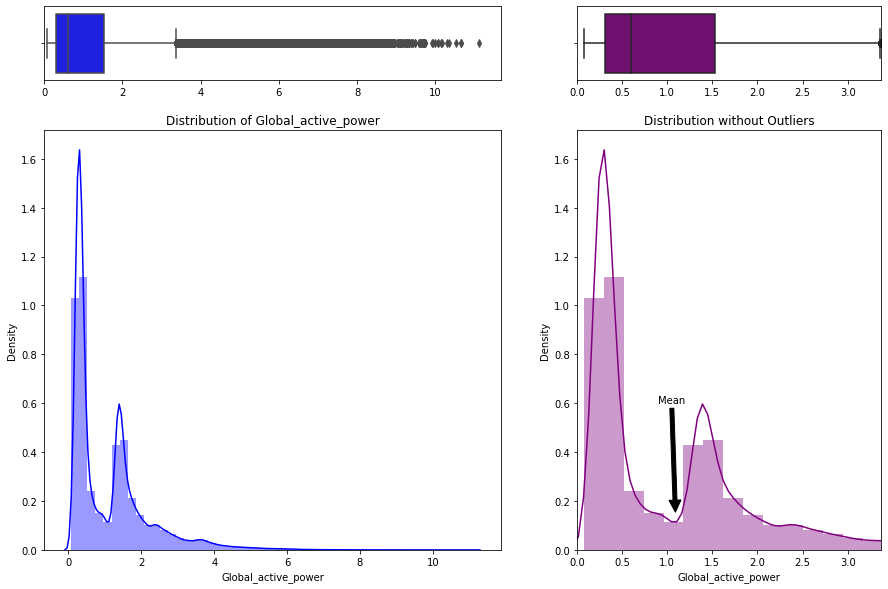

In [13]:
# Create subplots
f, axes = plt.subplots(2,
                       2, 
                       figsize=(15, 10), 
                       sharex=False, 
                       gridspec_kw={"height_ratios": (.15, .85),"width_ratios":(.60,.40)})
#Main boxplot
sns.boxplot(df["Global_active_power"] , color="blue", ax=axes[0,0])
axes[0,0].set_xlabel('')
axes[0,0].set_xlim(0, None)

#Main distribution
sns.distplot(df["Global_active_power"] , color="blue", ax=axes[1,0])
axes[0,0].set_xlim(0, None)
axes[1,0].set_title('Distribution of Global_active_power')

#Zoom boxplot
sns.boxplot(df["Global_active_power"], color="purple", ax=axes[0,1])
axes[0,1].set_xlabel('')
axes[0,1].set_xlim(0, 3.37)

#Zoom distribution
sns.distplot(df["Global_active_power"], color="purple", ax=axes[1,1])
axes[1,1].set_title('Distribution without Outliers')
axes[1,1].set_xlim(0, 3.37)

# Add an arrow to mark the mean value
axes[1,1].annotate(
'Mean', xy=(df["Global_active_power"].mean(), .15), xytext=(.9, .6),
arrowprops=dict(facecolor='black', shrink=0.01))

plt.show()

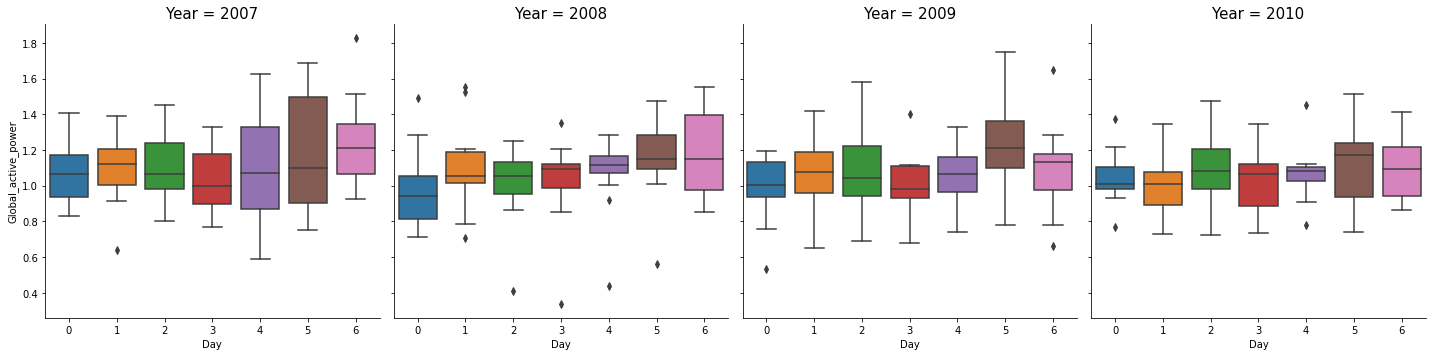

In [14]:
df_weekday_summary = df.groupby(by=['Year','Month','Day'], as_index=False)[['Global_active_power']].mean()

day_plot = sns.catplot(x="Day", y="Global_active_power", data=df_weekday_summary.query("Year != 2006"), 
           kind="box",
           col="Year")
day_plot.set_titles(size = 15)

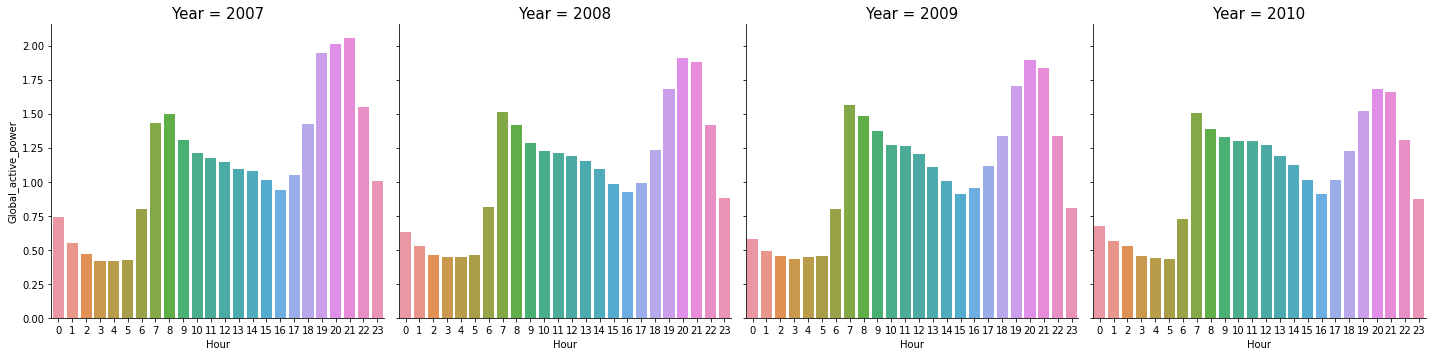

In [15]:
df_hourly_summary = df.groupby(by=['Year','Month','Day','Hour'], 
                                       as_index=False)[['Global_active_power']].mean()

hour_plot = sns.catplot(x="Hour", y="Global_active_power", data=df_hourly_summary.query("Year != 2006"), 
           kind="bar",
           col="Year",
           ci=None)
hour_plot.set_titles(size = 15)

**visualize daily resampled dataframe**

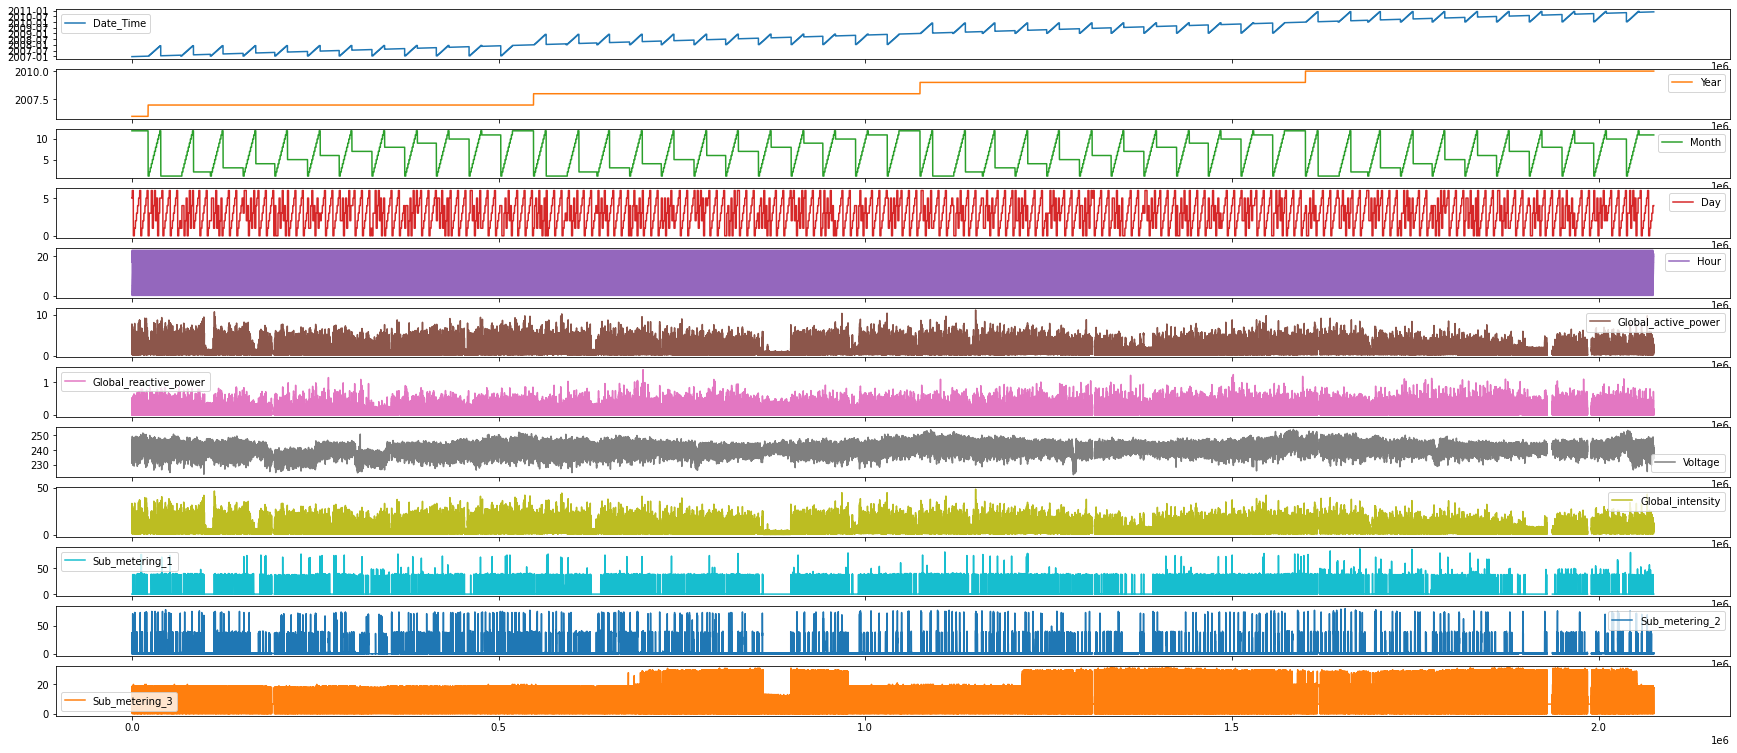

In [16]:
# visualize daily resampled dataframe
df.plot(subplots=True, figsize=(30,13))
plt.show()

**Distribution**

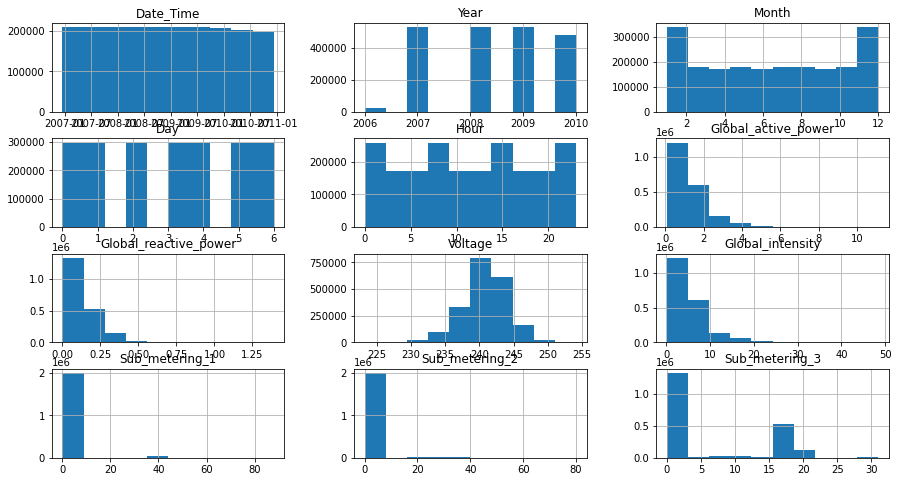

In [17]:
# Plot distribution of data after imputation
df.hist(figsize=(15, 8))
plt.show()

**Global Active Power by Years**

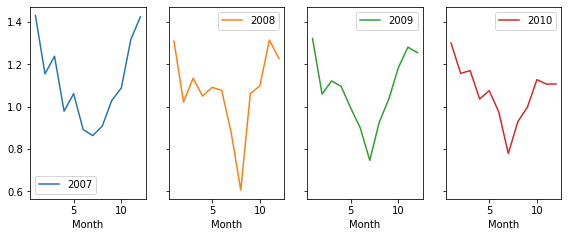

In [18]:
#Global Active Power by Years
pd.pivot_table(df.loc[df['Year'] != 2006], values = "Global_active_power", 
               columns = "Year", index = "Month").plot(subplots = True, figsize=(12, 12), layout=(3, 5), sharey=True);

**factor Plot of Global active power by Weekend/Weekday**

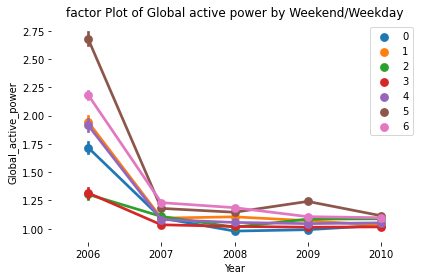

In [19]:
#Factor Plot of Global Active Power by Weekday vs. Weekend
plt1=sns.factorplot('Year','Global_active_power',hue='Day',
                    data=df, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('factor Plot of Global active power by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

**Make Date_Time is index**

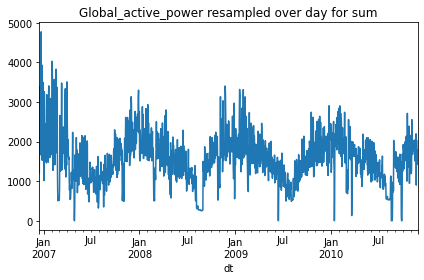

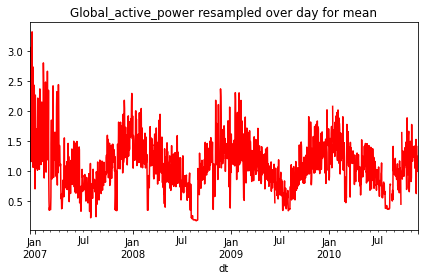

In [20]:
df_time = pd.read_csv('/content/drive/MyDrive/new_project/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df_time.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

df_time.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

**Global_active_power per quarter (averaged over quarter**

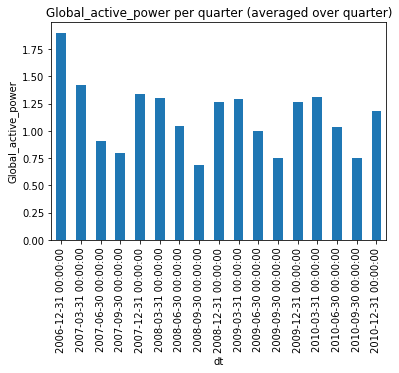

In [21]:
df_time['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

**Yearly - Total watt-hour for Power Consumption**

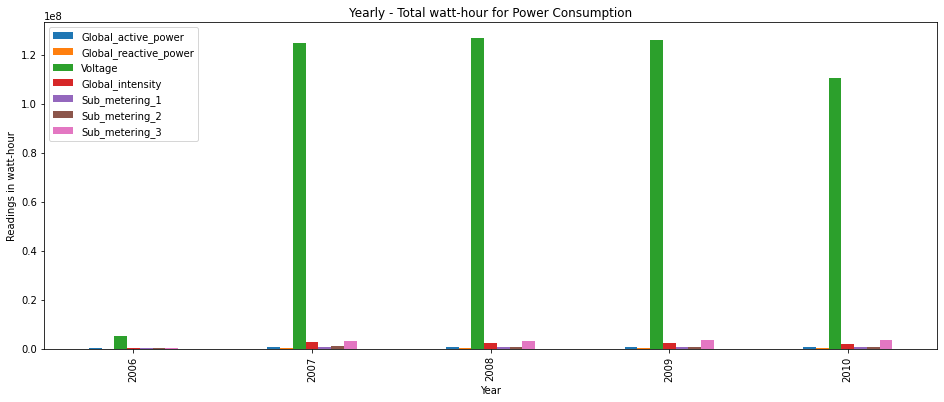

In [22]:
# Yearly - Total watt-hour for Power Consumption

df_time.groupby(df_time.index.year).sum().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Total watt-hour for Power Consumption", figsize=(16,6))

**Yearly - Maximum watt-hour for Power Consumption**

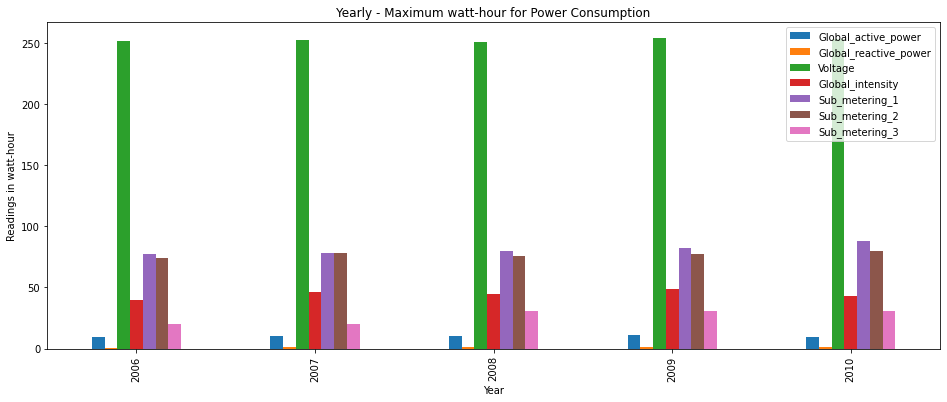

In [23]:
# Yearly - Maximum watt-hour for Power Consumption

df_time.groupby(df_time.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Maximum watt-hour for Power Consumption", figsize=(16,6))

** Yearly - Average watt-hour for Power Consumption**

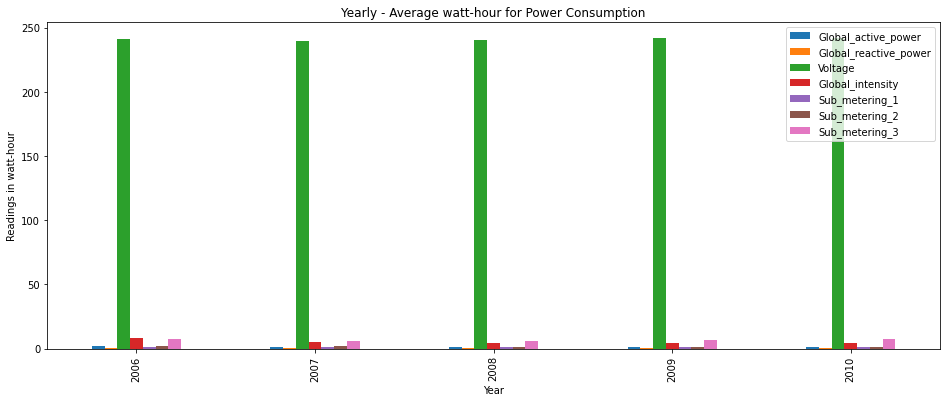

In [24]:
# Yearly - Average watt-hour for Power Consumption

df_time.groupby(df_time.index.year).mean().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Average watt-hour for Power Consumption", figsize=(16,6))

**Yearly - Maximum watt-hour for sub_meterings**

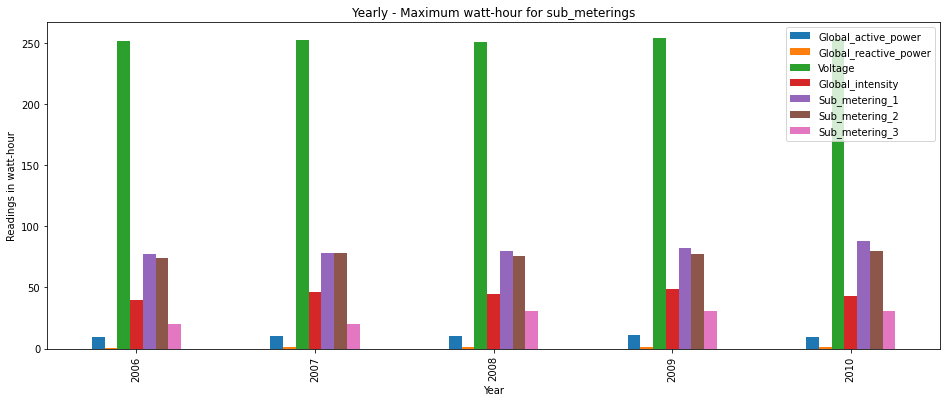

In [25]:
# Yearly - Maximum watt-hour for sub_meterings

df_time.groupby(df_time.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Maximum watt-hour for sub_meterings",figsize=(16,6))

**Yearly - Average watt-hour for sub_meterings**

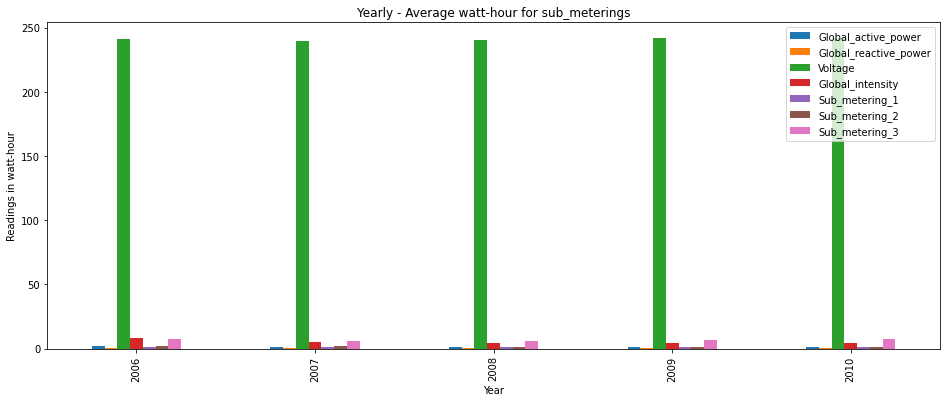

In [26]:
# Yearly - Average watt-hour for sub_meterings

df_time.groupby(df_time.index.year).mean().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Average watt-hour for sub_meterings",figsize=(16,6))

**flow - sum of power consumptions Global_active_power**

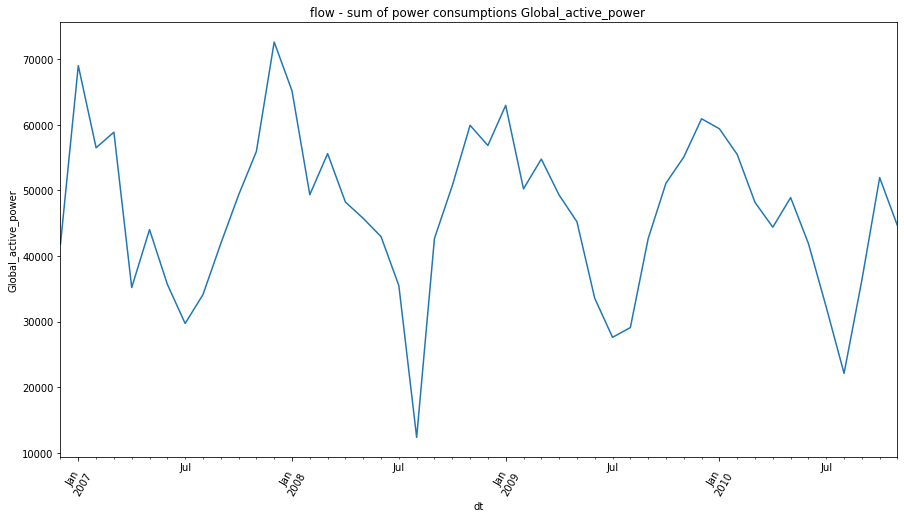

In [27]:
plt.figure(figsize=(15,8)) # size of plot
# Sum of 'Global_active_power' resampled over month
df_time['Global_active_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('flow - sum of power consumptions Global_active_power ')
plt.show()

**flow of consumptions Global_active_power (averaged over months)**

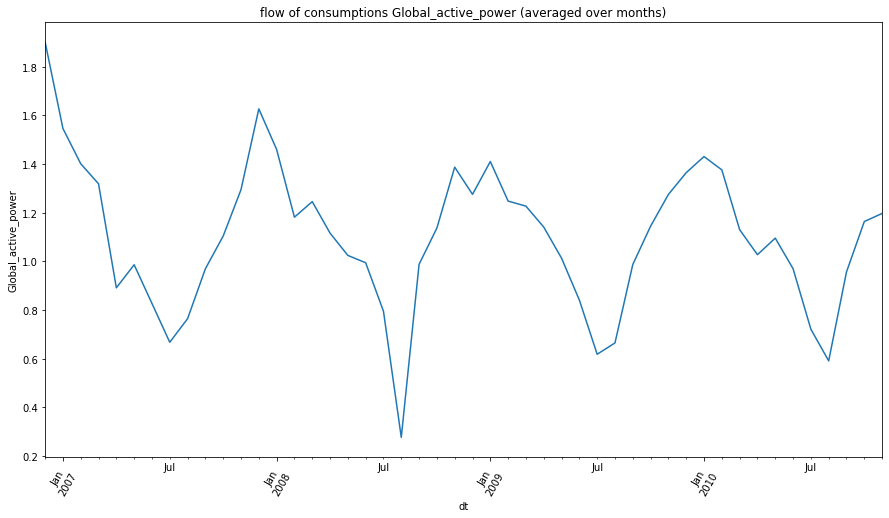

In [28]:
plt.figure(figsize=(15,8)) # size of plot
# mean of 'Global_active_power' resampled over month
df_time['Global_active_power'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('flow of consumptions Global_active_power (averaged over months)')
plt.show()

**flow -sum  of power consumptions Sub_metering_1**

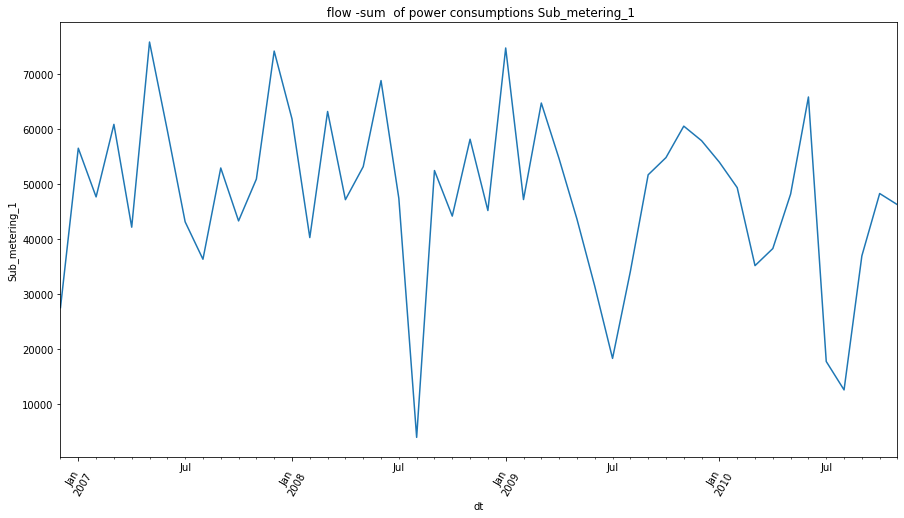

In [29]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_1' resampled over month
df_time['Sub_metering_1'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title(' flow -sum  of power consumptions Sub_metering_1')
plt.show()

**flow - sum of power consumptions Sub_metering_2**

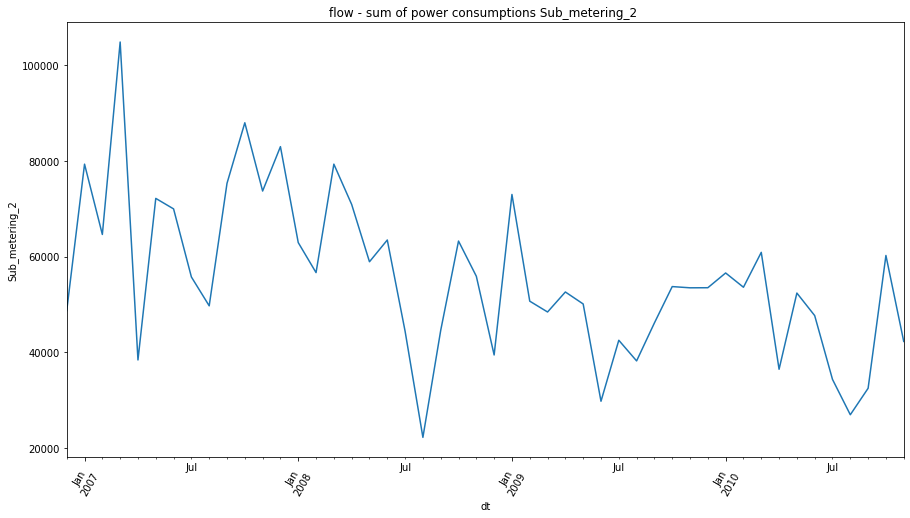

In [30]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_2' resampled over month
df_time['Sub_metering_2'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title('flow - sum of power consumptions Sub_metering_2 ')
plt.show()

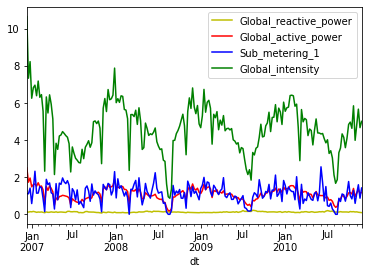

In [31]:
## resampling over week and computing mean
df_time.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df_time.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df_time.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df_time.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

**'Sub_metering_1 per quarter (summed over quarter)'**

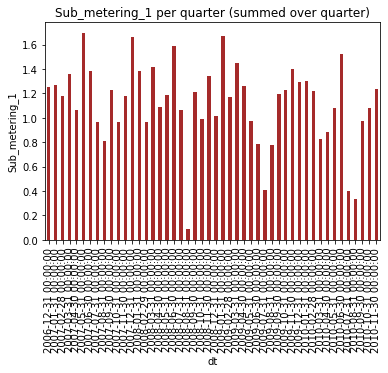

In [32]:
df_time['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

**Label Encoder**

In [33]:
from sklearn import preprocessing

#summarize by mean hourly energy
energy_hourly_summary = df.groupby(
    by=['Year','Month','Day',"Hour"], as_index=False)[['Global_active_power']].mean()

#create the Label Encoder object
le = preprocessing.LabelEncoder()

#encode categorical data
energy_hourly_summary['Year'] = le.fit_transform(energy_hourly_summary['Year'])
energy_hourly_summary.head()

,Year,Month,Day,Hour,Global_active_power
0,0,12,0,0,0.637967
1,0,12,0,1,0.760033
2,0,12,0,2,0.361233
3,0,12,0,3,0.449950
4,0,12,0,4,0.802500


**Train and Test Data**

In [34]:

indexed_engery = df[['Date_Time','Global_active_power', 'Year', 'Month']].set_index('Date_Time');
train = indexed_engery[indexed_engery['Year'] < 2010] #train set is years 2006 - 2009
test = indexed_engery[indexed_engery['Year'] == 2010] #test set is year 2010

**Forecasting using Sirimax**

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
train_monthly=train[['Global_active_power']].resample('W').mean()
mod = SARIMAX(train_monthly, order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 50), #50 = number of weeks that we are forcasting
                                enforce_stationarity=False,
                                enforce_invertibility=False)


**Training**

In [36]:
results = mod.fit()

**Forecasting**

In [37]:
results.forecast()

2010-01-10    1.017593
Freq: W-SUN, dtype: float64

**Prediction**

In [38]:

predictions = results.predict(start='2010-01-03', end='2010-12-19')

**Evaluate Performance of sirimax**

In [39]:
#merge on Date_Time
test[['Global_active_power']].resample('W').mean().reset_index()
prediction = pd.DataFrame(predictions).reset_index()
prediction.columns = ['Date_Time','Global_active_power']

res = pd.merge(test[['Global_active_power']].resample('W').mean(), 
               prediction, 
               how='left', 
               on='Date_Time')

res.columns = ['Date_Time','actual','predictions']
res.insert(3, 'residuals', res['actual'] - res['predictions']) #residuals
res.head()

,Date_Time,actual,predictions,residuals
0,2010-01-03,0.976101,1.509101,-0.533000
1,2010-01-10,0.920572,1.017593,-0.097021
2,2010-01-17,1.362677,1.304946,0.057731
3,2010-01-24,1.535147,1.045742,0.489405
4,2010-01-31,1.548028,0.850140,0.697889


**Actual vs Predicted**

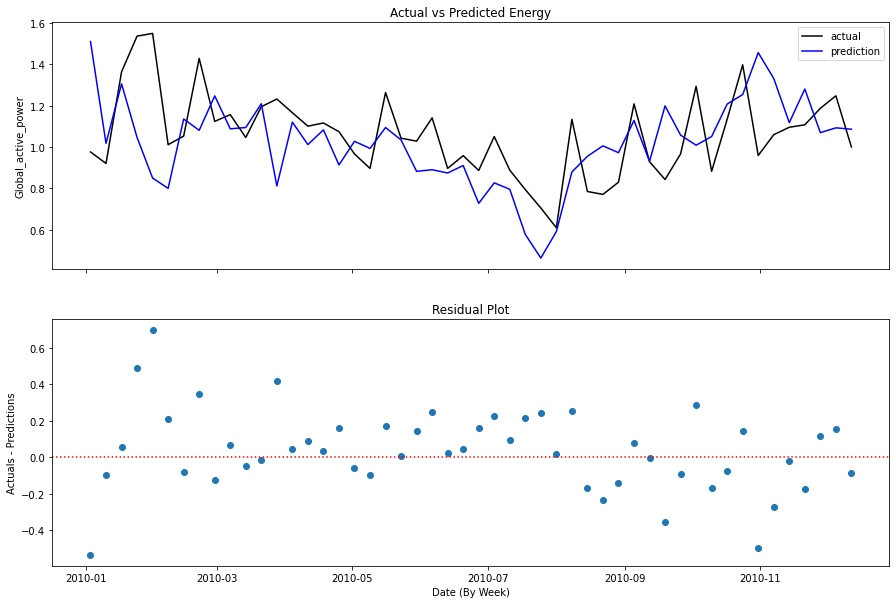

MSE =  0.05175286065414282


In [40]:
f, axes = plt.subplots(2, figsize=(15, 10), sharex=True)

#plot of actual vs predictions
axes[0].plot(res['Date_Time'],res['actual'], color='black', label='actual')
axes[0].plot(res['Date_Time'],res['predictions'], color='blue', label='prediction')
axes[0].set_title('Actual vs Predicted Energy')
axes[0].set_ylabel('Global_active_power')
axes[0].legend()

#plot of actual - predictions
axes[1].scatter(res['Date_Time'],(res['actual'] - res['predictions']))
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Date (By Week)')
axes[1].set_ylabel('Actuals - Predictions')
axes[1].axhline(y=0, color='r', linestyle=':')

plt.show()

#MSE
print("MSE = ", np.mean(res['residuals']**2)) #MSE

# **Market Basket Model**

**Apriori Algorithm**

In [41]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from apyori import apriori

In [43]:
len(df.columns)

14

In [44]:
association_rules = apriori(df, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [45]:
print(association_rules)

<generator object apriori at 0x7f906746c8d0>


In [46]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

**FP Growth**

In [47]:
!pip install pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pyfpgrowth

In [49]:
patterns = pyfpgrowth. find_frequent_patterns(df, 10)

In [50]:
rules = pyfpgrowth. generate_association_rules(patterns,0.8)